### K-Means Clustering

In [1]:
# euclidean distance function
def euclidean_distance(obj1, obj2):
    dist = 0
    for i in range(len(obj1)):
        dist += math.pow((obj1[i]-obj2[i]),2)
    return math.sqrt(dist)

# euclidean_distance(data.data[0], data.data[1])

In [2]:
# randomize seed
def rand_seed(data, k):
    X = data.data
    y = data.target
    data = pd.DataFrame(data=X, columns = data.feature_names)
    seeds = data.sample(k)
    return seeds

# print(rand_seed(data, 3))

In [3]:
# choose the most similar value
def choose_cluster(obj, centroids):
    min = 999
    cluster = -1
    i = 0
    for centroid in centroids:
        i += 1
        dist = euclidean_distance(obj, centroid)
        if dist < min :
            min = dist
            cluster = i
    return cluster

# choose_cluster(data.data[4], list_centroid.values.tolist())

In [4]:
# inisialisasi clusters
def initialize_clusters(centroids):
    clusters = []
    for i in range (len(centroids)):
        clusters.append([])
    return clusters

# print(initialize_clusters(list_centroid))

In [5]:
# clustering objects
def clustering(data, centroids):
    hasil = []
    clusters = initialize_clusters(centroids)
    clustersIdx = initialize_clusters(centroids)
    for i in range(len(data.data)):
        obj = data.data[i]
        cluster = choose_cluster(obj, centroids)
        clusters[cluster-1].append(obj.tolist())
        clustersIdx[cluster-1].append(i)
    hasil.append(clusters)
    hasil.append(clustersIdx)
    return hasil

In [6]:
# calculate means value
def means_value(cluster):
    means = []
    for i in range(len(cluster[0])):
        means.append(0)
    for obj in cluster:
        i = 0
        for el in obj:
            means[i] += el
            i += 1
    for i in range(len(means)):
        means[i] /= len(cluster)
    return means

# print(means_value(clusters[2]))

In [7]:
# create new centroid
def new_centroid(clusters):
    centroids = []
    for cluster in clusters[0]:
        centroids.append(means_value(cluster))
    return centroids

# print(new_centroid(clusters))

In [8]:
# check whether clusters convergence or not
def isConvergence(means1, means2):
    if all(i in means1 for i in means2):
        return True
    else:
        return False
    
# print(isConvergence(means_value(clusters[1]),means_value(clusters[1])))

In [9]:
# KMEANS CLUSTERING ALGORITHM
def kmeans_clustering(data, k):
    centroids = rand_seed(data, k).values.tolist()
    temp = centroids
    while True:
        clusters = clustering(data, centroids)
        centroids = new_centroid(clusters) 
        if isConvergence(centroids, temp):
            break
        else:
            temp = centroids
    return clusters

In [10]:
#Get label_pred from kmeans result
def getLabelPred(clusters):
    label_predCluster = []
    _clusterLabel =[]
    idx = 0
    for clusterN in clusters:
        label_predCluster.append([])
        for i in clusterN:
            label_predCluster[idx].append(data.target[i])
        idx+=1

#     print(label_predCluster)
    for groupCluster in label_predCluster :
        max = 0
        for labelIdx in groupCluster : 
            label = labelIdx
            freq = groupCluster.count(label)
            if freq >= max: 
                max = freq 
                clusterLabel = label
        _clusterLabel.append(clusterLabel)
#     print(_clusterLabel)   

    label_pred = []
    idx = 0
    for clusterN in clusters:
        for i in clusterN:
            label_pred.insert(i, _clusterLabel[idx])
        idx+=1

    return label_pred

# MAIN PROGRAM

In [11]:
#LIBRARY
from sklearn.datasets import load_iris
from sklearn.metrics.cluster import fowlkes_mallows_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## CLUSTERING

In [12]:
#load iris
data = load_iris()

# doing clustering using kmeans
kmeans =  kmeans_clustering(data, 3)

# get label from clustering result
label_pred = getLabelPred(kmeans[1])
label_true = data.target
print('Label :\n',label_pred)

Label :
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


## EVALUATION

In [13]:
# evaluation matriks using fowlkes mallows
fms = fowlkes_mallows_score(label_true,label_pred)
print('Fowlkes-Mallows : ',fms)

ss = silhouette_score(data.data, label_pred, sample_size=50)
print('Silhouette Score : ',ss)

Fowlkes-Mallows :  0.8112427991975698
Silhouette Score :  0.5094213019255858


## VISUALIZATION

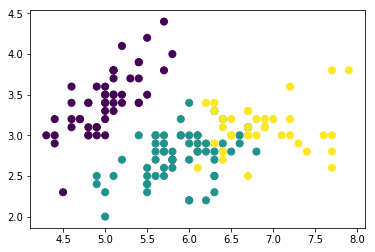

In [14]:
# visualization
plt.scatter(data.data[:, 0], data.data[:, 1], c=label_pred, s=50, cmap='viridis')

## ANALISIS

Fowlkes-Mallows digunakan untuk mengetahui tingkat kemiripan antar cluster, nilainya ada dalam rentang 0 sampai 1. Semakin nilai fowlkess-mallow mendekati 1 artinya semakin tinggu tingkat kemiripan kedua cluster yang dibandungkan. Fungsionalitas tersebut juga dapat digunakan untuk melihat akurasi model clustering dengan cara membandingkan hasil kmeans dengan target aslinya. 

Berdasarkan evaluasi dengan metrik Fowlkes-Mallows dengan parameter label hasil prediksi dan label kelas sebenarnya, didapatkan nilai sebesar 0.869073969041357

Silhouette Coefficient merupaka model pengujian yang dilakukan untuk mengetahui seberapa dekat relasi antara objek dalam sebuah cluster dan seberapa jauh sebuah cluster terpisah dengan cluster lain. Nilai hasil silhouette coefficient terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1, maka semakin buruk pengelompokan data didalam satu cluster.

Berdasarkan evaluasi dengan metrik Fowlkes-Mallows dengan parameter label hasil prediksi dan label kelas sebenarnya, didapatkan nilai sebesar 0.34309462262613477

Dengan nilai yang Fowlkes-Mallows(0.869073969041357 dari rentang 0-10) dan Silhouette Coefficient(0.34309462262613477 dari rentang -1 s/d 1) yang melebihi 50%, dapat diambil kesimpulan bahwa model clustering yang digunakan sudah cukup baik.

In [15]:
# CROSS CHECK DENGAN LIBRARY
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import fowlkes_mallows_score

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data.data)
# Getting the cluster labels
labels = kmeans.predict(data.data)
# Centroid values
centroids = kmeans.cluster_centers_
# fowlkes_mallows_score(y, labels)
# print(labels)
# print(centroids)